In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

pd.set_option("display.max_columns",50)
#pd.set_option("display.html.table_schema",True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

data = datasets.load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
data.data.shape

(506, 13)

In [4]:
data.target.shape

(506,)

In [5]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1
119,0.14476,0.0,10.01,0.0,0.547,5.731,65.2,2.7592,6.0,432.0,17.8,391.50,13.61,19.3
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70,20.4
336,0.03427,0.0,5.19,0.0,0.515,5.869,46.3,5.2311,5.0,224.0,20.2,396.90,9.80,19.5


In [7]:
df = df.dropna().reset_index(drop=True)

In [8]:
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1)) #Series condition setting
    is_low = ((s <= -0.6) & (s > -1))

    return ['background-color: yellow' if v else '' for v in is_high]
    #return ['background-color: red' if v else '' for v in is_low]

df.corr().round(3).style.apply(highlight_highcorr)

In [9]:
from pandas.tools.plotting import scatter_matrix
#from pandas.plotting import scatter_matrix

#scatter_matrix(df[['RM', 'LSTAT']],figsize=(20, 20),color='b')

## train_test_split

In [10]:
from sklearn.model_selection import train_test_split

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT']]
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


## StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## Polynomial

In [12]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)

X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

#X_train_poly = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2
#X_test_poly = quadratic.fit_transform(X_test_raw) #產生x^0, x^1, x^2
X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std)
X_poly = quadratic.fit_transform(X_std)

In [13]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


## SGDRegressor

In [14]:
from sklearn import linear_model

#SGDRegressor的input y需要一維矩陣type
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

sgdr = linear_model.SGDRegressor(max_iter=10,learning_rate='constant',eta0=0.01)
sgdr.fit(X_train_std, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_std) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_std,y_test))

各變項參數: [-1.84306768  1.14494229  0.07498247  0.3557416  -2.19118309  1.53969604
  0.0916396  -3.28179542  2.29303461 -2.18280325 -1.530008    1.09212135
 -4.22716526]
MSE: 19.07
R Square: 0.754769168681


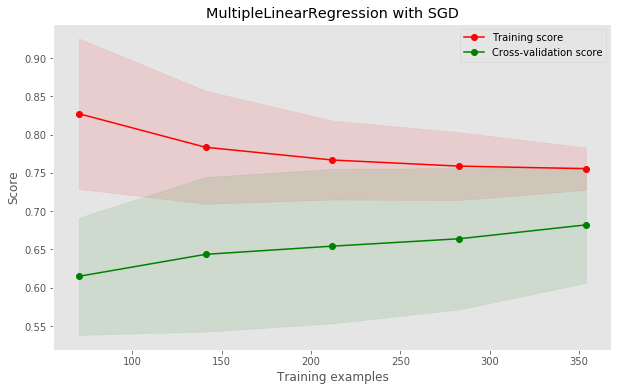

In [15]:
from sklearn.model_selection import ShuffleSplit
#cv = KFold(n_splits=4, random_state=None, shuffle=True)
cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=5000,learning_rate='constant',eta0=0.001)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD", X_std, y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## SGDRegressor + Polynomial

In [16]:
from sklearn import linear_model

y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

sgdr = linear_model.SGDRegressor(max_iter=10,learning_rate='constant',eta0=0.01)
sgdr.fit(X_train_poly, y_train)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_poly) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_poly, y_test_1d))

各變項參數: [ -3.50961272e+09  -4.57594003e+10   8.87048978e+09  -7.36365770e+10
   2.38352124e+10  -7.75890510e+10   1.18844275e+10   4.93158524e+10
   5.77606470e+10   7.10048565e+09  -4.85934954e+09   2.21578778e+09
  -8.29734508e+10  -3.00751320e+10   2.24650758e+11   1.81683106e+10
  -2.34339816e+10   5.49223174e+10  -5.56410083e+10   2.08729928e+11
  -1.55264214e+10  -4.02303848e+10  -7.01248604e+10  -6.60803042e+10
  -3.02590978e+10   4.52670555e+11   8.47960501e+10  -1.17045933e+11
  -2.07627543e+09   5.20465758e+10   4.04879936e+10   6.76741880e+10
   9.56231491e+10   6.57101886e+10   5.78531525e+09   3.10266287e+09
  -1.12471786e+10  -5.16507716e+10   2.80234653e+09   4.66021506e+09
  -5.56802779e+10  -2.63386415e+10  -1.59129004e+10   3.41472191e+10
   7.81193474e+08   4.80808418e+10  -8.68323295e+10   1.87362627e+10
   2.21597006e+09  -1.44892259e+10   7.63863173e+10  -6.89686291e+10
   9.82708848e+10   8.19714750e+10   8.97998561e+09  -4.47472717e+10
  -1.45561268e+10  -6.75044

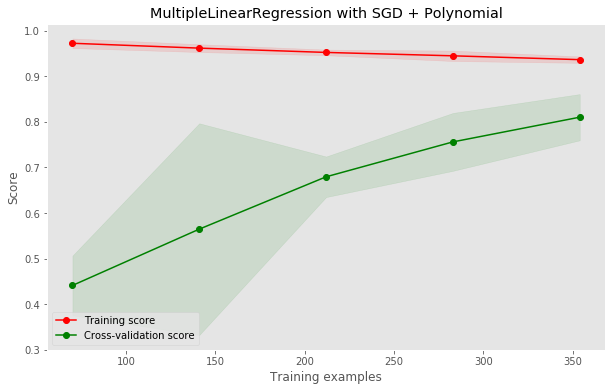

In [17]:
from sklearn.model_selection import ShuffleSplit, KFold
#cv = KFold(n_splits=4, random_state=None, shuffle=True)
cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=3000,learning_rate='constant',eta0=0.0001)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD + Polynomial", X_poly, y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Linear Regression

In [18]:
# linear regression
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_std) - y_test) ** 2))
print("R Square:",regr.score(X_test_std,y_test))

各變項參數: [[-1.02792386  1.22499613  0.0962565   0.78294892 -2.08883196  2.21178898
   0.20815728 -3.38351883  2.86606139 -2.26863455 -1.76907023  0.89807674
  -4.41759937]]
MSE: 16.43
R Square: 0.788662951039


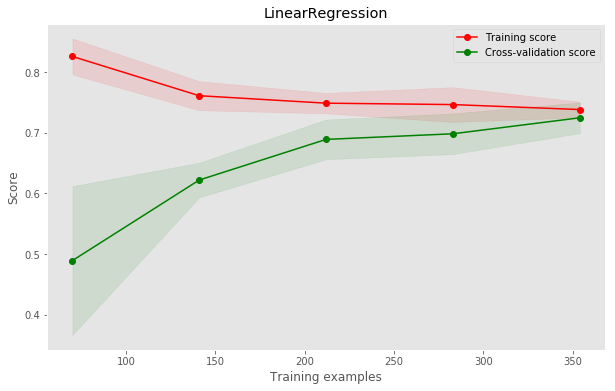

In [19]:
from sklearn.model_selection import ShuffleSplit, KFold
#cv = KFold(n_splits=4, random_state=None, shuffle=True)
cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = linear_model.LinearRegression()

plot_learning_curve(estimator, "LinearRegression", X_std, y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Linear Regression with Polynomial

In [20]:
regr = linear_model.LinearRegression()

regr.fit(X_train_poly, y_train)

print('各變項參數: \n', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",regr.score(X_test_poly, y_test))

各變項參數: 
 [[  4.33984415e-12   3.00847782e+00   6.22767223e+00   1.66301035e+01
   -2.22175621e+12  -1.51985772e+00   3.35092819e+00  -2.00463836e+00
   -2.72412580e+00   1.55889819e+01  -2.53111660e+01   7.67990229e-01
    2.12624698e+00  -3.60040355e+00   1.58284316e-01   1.91684583e+01
    3.97398129e+01   4.07022714e+00  -1.12409588e+00   8.83823989e-01
   -1.81885065e+00  -8.56153442e-01   3.89201428e+01  -6.84845529e+01
    4.22942601e+00  -4.25757993e-01   1.70012617e+00  -1.68636005e-01
   -4.78055257e-01  -2.52916621e-02  -2.49285683e+00   4.05404249e-02
   -2.11726011e-02  -6.32293701e-01   6.76574707e-02   1.43093872e+00
   -1.69250488e-01   4.10690308e-01  -1.23289490e+00   1.93064880e+00
    3.97613525e-01   9.03881073e-01   1.29852295e-01   2.17669678e+00
    3.69134903e+00  -1.23265076e+00   5.33683777e-01  -2.48107910e-01
    2.01763916e+00  -1.48623276e+00   6.62812624e+11  -1.09518433e+00
   -1.23457336e+00   2.87429810e-01   5.33088684e-01   1.35783768e+00
   -1.02926

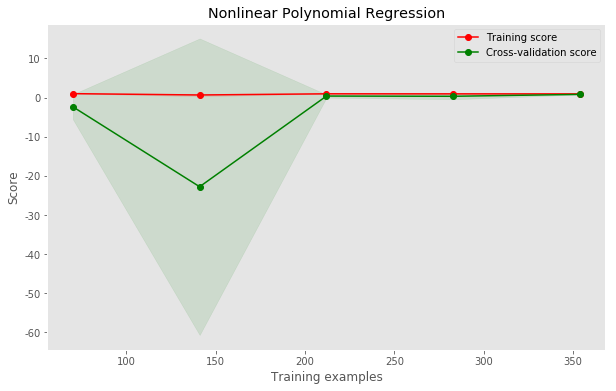

In [21]:
from sklearn.model_selection import ShuffleSplit, KFold
#cv = KFold(n_splits=4, random_state=None, shuffle=True)
cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, "Nonlinear Polynomial Regression", X_poly, y, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Ridge (L2 norm + Linear Regression)

In [22]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train_std, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_std) - y_test) ** 2))
print("R Square:",ridge.score(X_test_std, y_test))

各變項參數: [[-1.01512966  1.20203368  0.06289879  0.78686104 -2.04913835  2.22405327
   0.19789013 -3.34304738  2.76488845 -2.17251082 -1.75962335  0.89812251
  -4.39660239]]
MSE: 16.38
R Square: 0.789400815462


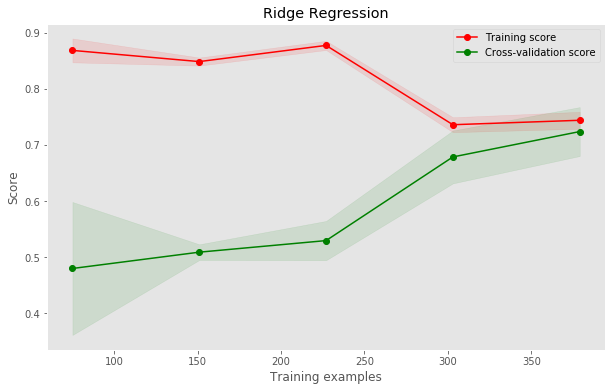

In [23]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression", X_std, y.values.ravel(), cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Ridge + Polynomial

In [24]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_poly, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_poly) - y_test) ** 2))
print("R Square:",ridge.score(X_test_poly, y_test))

各變項參數: [[ 0.          0.50969614 -0.18236842  1.46280963  0.13616435 -1.37108303
   3.13657495 -1.56415177 -3.05847672  1.39829799 -1.382005   -0.73096298
   1.70560386 -3.69213324  0.13864119 -0.19166553  0.9579572   3.1763232
  -1.02003094  0.87280966 -1.30229657 -0.42490441 -1.88569165  0.2688761
  -0.46970996 -0.36599458  1.49083309  0.18712102 -0.30035716  0.16617202
  -0.58825787 -0.06149422 -0.05811512 -0.70083837  0.25455524  1.25170353
  -0.03278979 -0.11904361 -0.88942556  0.91669503 -0.08858694  1.91988169
   0.19343573  1.87777364  2.64406379  0.21301443  0.4443288  -0.77632978
   1.03999027 -0.93584905  0.45642461 -1.01862026 -1.17423899  0.30336546
   0.2834055   0.09171308  0.50977087 -0.20008934 -0.09444589 -0.24352757
  -0.44570671  0.43466102 -0.51685587  1.86654394 -0.76472424  0.18167537
  -1.42254568 -0.49706202  0.75584149  0.06446809 -0.74677533  0.41226737
  -0.33403194 -1.56887531 -1.10972423 -0.05704569 -1.07538361  0.05228194
   0.36305454  2.38122506 -1.3650

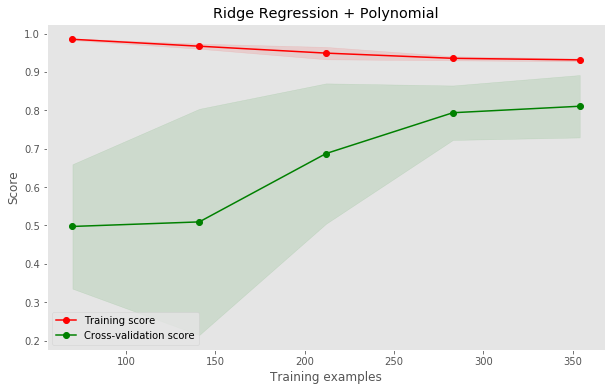

In [25]:
from sklearn.model_selection import KFold

#cv = KFold(n_splits=4, random_state=None, shuffle=True)
cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression + Polynomial", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## LASSO (L1 norm + Linear Regression)

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train_std, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",lasso.score(X_test_std, y_test))

各變項參數: [-0.          0.         -0.          0.11652105 -0.          2.15309515
 -0.         -0.         -0.         -0.         -1.12608501  0.22962408
 -4.14218304]
MSE: 21.44
R Square: 0.724261789308


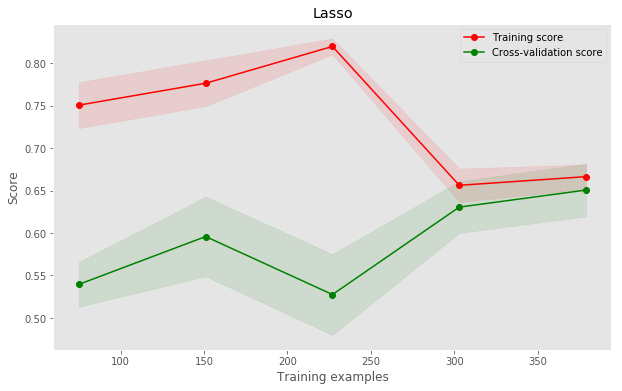

In [27]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = Lasso(alpha=1)

plot_learning_curve(estimator, "Lasso", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## LASSO + Polynomial

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train_poly, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_poly) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",lasso.score(X_test_poly, y_test))

各變項參數: [ 0.         -0.          0.         -0.          0.         -0.
  1.83409973 -0.         -0.         -0.         -0.         -0.44675464
  0.         -4.13680949 -0.09174415  0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.13809915  0.          0.         -0.         -0.
  0.          0.         -0.          0.25299269 -0.         -0.          0.
 -0.          0.          0.          0.          0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.          0.
 -0.          0.79409731 -0.          0.         -0.         -0.         -0.9312489
  0.         -0.20726751  0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.         -0.
 

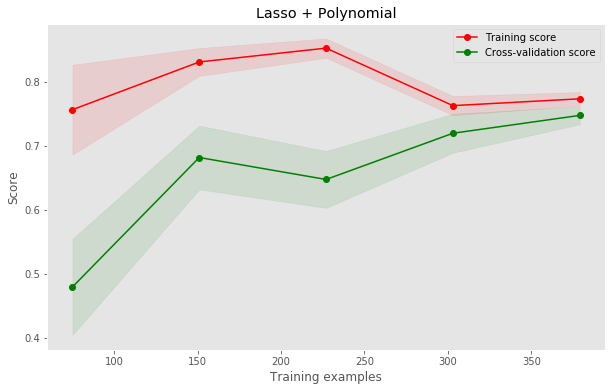

In [29]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = Lasso(alpha=1)

plot_learning_curve(estimator, "Lasso + Polynomial", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Elastic Net (L1 + L2)

In [30]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1)
elastic.fit(X_train_std, y_train)

print('各變項參數:', elastic.coef_)
print("MSE: %.2f" % np.mean((elastic.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",elastic.score(X_test_std, y_test))

各變項參數: [-0.33648458  0.03957421 -0.32006714  0.48124799 -0.21398858  2.08071581
 -0.         -0.01949557 -0.         -0.2744103  -1.09496044  0.5679405
 -2.62698004]
MSE: 22.27
R Square: 0.713550972063


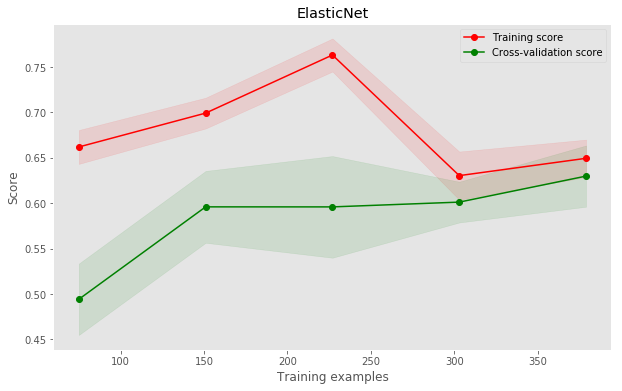

In [31]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = ElasticNet(alpha=1)

plot_learning_curve(estimator, "ElasticNet", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Elastic Net + Polynomial

In [32]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1)
elastic.fit(X_train_poly, y_train)

print('各變項參數:', elastic.coef_)
print("MSE: %.2f" % np.mean((elastic.predict(X_test_poly) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",elastic.score(X_test_poly, y_test.values.ravel()))

各變項參數: [ 0.         -0.          0.         -0.23654767  0.         -0.19179552
  1.9479597  -0.26069794 -0.         -0.         -0.32881326 -0.65479659
  0.         -2.21832219 -0.06751387  0.         -0.          0.         -0.
 -0.         -0.          0.         -0.12459492 -0.         -0.         -0.
 -0.          0.17728191 -0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.3807607   0.          0.          0.          0.
  0.          0.         -0.          0.32200567 -0.         -0.00321302
  0.         -0.          0.11597232  0.27017069  0.0454409   0.         -0.
 -0.20368119 -0.126812    0.          0.         -0.         -0.         -0.
  0.         -0.          0.71605786 -0.          0.         -0.23540533
 -0.34834839 -0.75477209  0.         -0.13284224  0.         -0.          0.
  0.         -0.         -0.         -0.13387639 -0.          0.          0.
  0.    

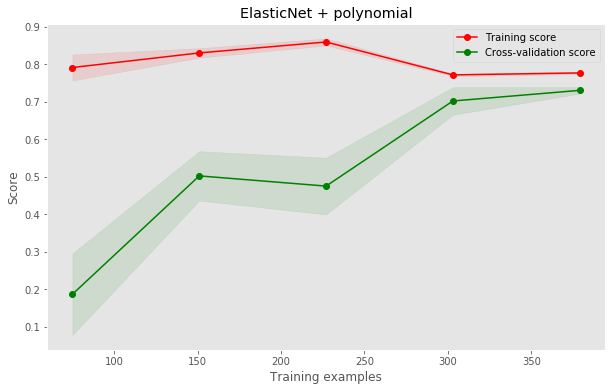

In [33]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = ElasticNet(alpha=1)

plot_learning_curve(estimator, "ElasticNet + polynomial", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## KNN Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=2,weights='uniform') # or weight='distance'
knnr.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((knnr.predict(X_test_std) - y_test) ** 2))
print("R Square:",knnr.score(X_test_std, y_test))

MSE: 11.84
R Square: 0.84776430054


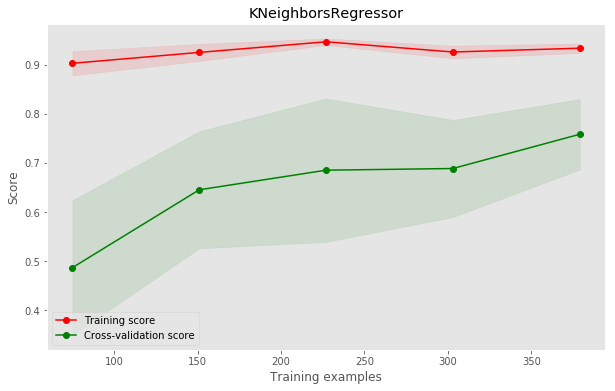

In [35]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = KNeighborsRegressor(n_neighbors=2,weights='uniform')

plot_learning_curve(estimator, "KNeighborsRegressor", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

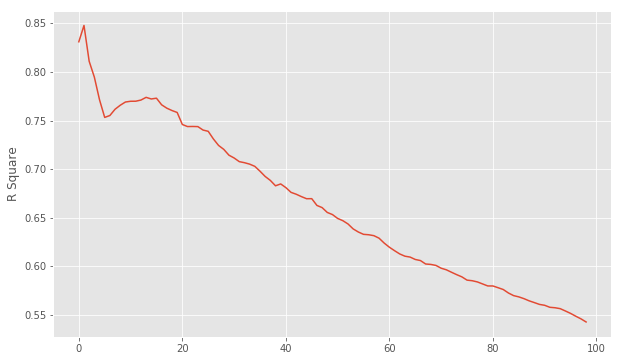

In [36]:
# 校調k值
score_list=[]
for i in range(1, 100):
    knnr = KNeighborsRegressor(n_neighbors=i)
    knnr.fit(X_train_std, y_train)
    score_list.append(knnr.score(X_test_std, y_test))
plt.figure(figsize=(10,6))
plt.ylabel('R Square')
plt.plot(score_list)

## SVM Regressor

In [37]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_std, y_train.values.ravel()) #ravel()壓縮成一維矩陣

print("MSE: %.2f" % np.mean((svr.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",svr.score(X_test_std, y_test.values.ravel()))

MSE: 27.57
R Square: 0.645481843944


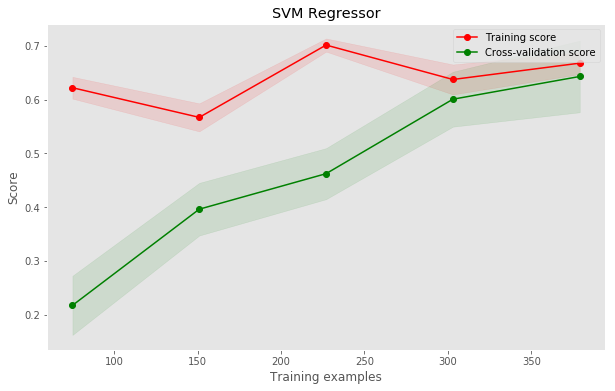

In [38]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = SVR(kernel='rbf')

plot_learning_curve(estimator, "SVM Regressor", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## 迴歸樹

In [39]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((dtr.predict(X_test_std) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",dtr.score(X_test_std, y_test))

MSE: 11.07
R Square: 0.857591088164


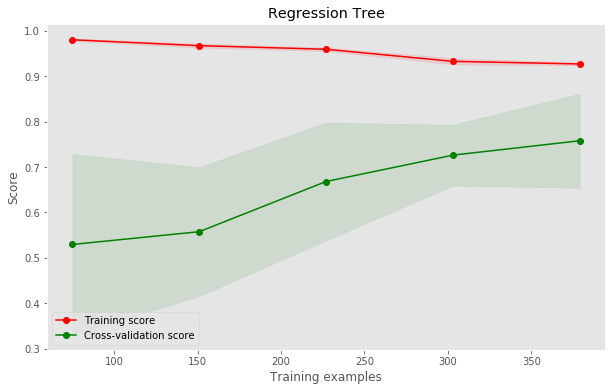

In [40]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = DecisionTreeRegressor(max_depth=5)

plot_learning_curve(estimator, "Regression Tree", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## BaggingRegressor

In [41]:
from sklearn.ensemble import BaggingRegressor

bagc = BaggingRegressor(n_estimators=100, oob_score=True)
bagc.fit(X_std,y)
print("oob_score(accuary):",bagc.oob_score_)
print("MSE: %.2f" % np.mean((bagc.predict(X_test_std) - y_test_1d) ** 2))
print("R Square:",bagc.score(X_test_std, y_test_1d))

oob_score(accuary): 0.872335449292
MSE: 1.27
R Square: 0.983656155263


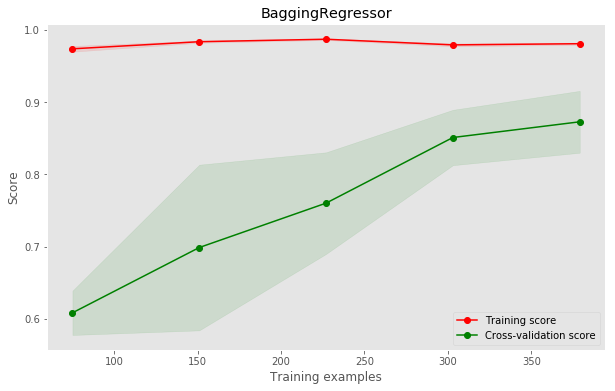

In [42]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = BaggingRegressor(n_estimators=100, oob_score=True)

plot_learning_curve(estimator, "BaggingRegressor", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Random Forest Regression (OOB)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='auto', oob_score=True)
rfc.fit(X_std,y)
print("oob_score(accuary):",rfc.oob_score_)
print("MSE: %.2f" % np.mean((rfc.predict(X_test_std) - y_test_1d) ** 2))
print("R Square:",rfc.score(X_test_std, y_test_1d))

oob_score(accuary): 0.869053109377
MSE: 1.23
R Square: 0.984182585609


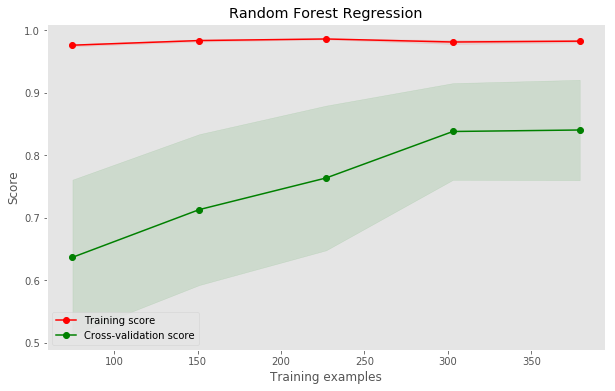

In [44]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='auto', oob_score=True)

plot_learning_curve(estimator, "Random Forest Regression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## AdaBoostRegressor

In [45]:
from sklearn.ensemble import AdaBoostRegressor

adb = AdaBoostRegressor(n_estimators=50, learning_rate=1)
adb.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((adb.predict(X_test_std) - y_test_1d) ** 2))
print("R Square:",adb.score(X_test_std, y_test_1d))

MSE: 11.23
R Square: 0.85554358756


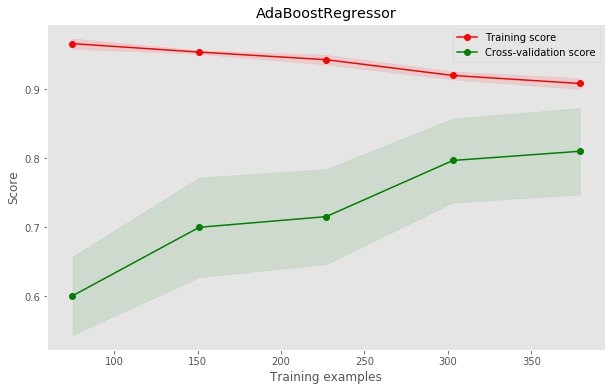

In [46]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = AdaBoostRegressor(n_estimators=50, learning_rate=1)

plot_learning_curve(estimator, "AdaBoostRegressor", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## XGBoost

In [47]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((xgbr.predict(X_test_std) - y_test_1d) ** 2))
print("XGBoost score:", xgbr.score(X_test_std, y_test_1d))
print("R Square:",xgbr.score(X_test_std, y_test_1d))

MSE: 7.89
XGBoost score: 0.898566741019
R Square: 0.898566741019


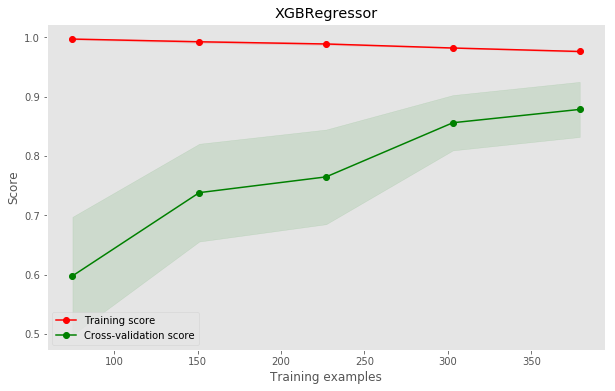

In [48]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=4, random_state=None, test_size=0.3)
estimator = xgb.XGBRegressor()

plot_learning_curve(estimator, "XGBRegressor", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
plt.show()

## Stacking

In [49]:
"""
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = SVC()
meta_clf = LogisticRegression()
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier=meta_clf)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

print('RNN Score:',clf1.score(X_test, y_test))
print('RF Score:',clf2.score(X_test, y_test))
print('GNB Score:',clf3.score(X_test, y_test))
print('SVC Score:',clf4.score(X_test, y_test))
print('Stacking Score:',stacking_clf.score(X_test, y_test))
"""

"\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.svm import SVR\nfrom sklearn.ensemble import RandomForestRegressor\nfrom mlxtend.classifier import StackingClassifier\n\nclf1 = KNeighborsClassifier()\nclf2 = RandomForestClassifier()\nclf3 = GaussianNB()\nclf4 = SVC()\nmeta_clf = LogisticRegression()\nstacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier=meta_clf)\n\nclf1.fit(X_train, y_train)\nclf2.fit(X_train, y_train)\nclf3.fit(X_train, y_train)\nclf4.fit(X_train, y_train)\nstacking_clf.fit(X_train, y_train)\n\nprint('RNN Score:',clf1.score(X_test, y_test))\nprint('RF Score:',clf2.score(X_test, y_test))\nprint('GNB Score:',clf3.score(X_test, y_test))\nprint('SVC Score:',clf4.score(X_test, y_test))\nprint('Stacking Score:',stacking_clf.score(X_test, y_test))\n"